In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc03s

Data load and region parameters

In [3]:
name = 'N604H'

In [4]:
reg = 'N604H'

In [5]:
pickle_in = open('SFresults//' + name + '.pkl',"rb")
SFresults = pickle.load(pickle_in)

In [6]:
B = SFresults['b2']
r = SFresults['s']
s0 = SFresults['s0']  
m = SFresults['m'] 
sig2 = SFresults['sig2'] 
r0 = SFresults['r0'] 
noise = B.mean()*0.005

In [7]:
model02 = lmfit.Model(bfunc03s)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.15
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 2.0

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r = r, r0 = r0, m = m, s0 = s0, noise = noise, sig2=sig2,
)

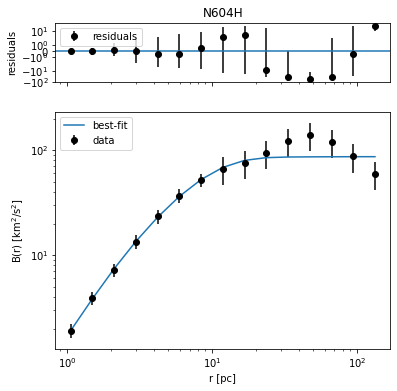

In [11]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title=reg,
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('Imgs//SF//' + reg + '.pdf', bbox_inches='tight')



In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc03s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 15
    # variables        = 5
    chi-square         = 6.11312798
    reduced chi-square = 0.61131280
    Akaike info crit   = -3.46417421
    Bayesian info crit = 0.07607680
[[Variables]]
    r0:     6.42950288 +/- 1.56604671 (24.36%) (init = 8.913251)
    sig2:   45.2233911 +/- 10.5348022 (23.30%) (init = 54.62046)
    m:      1.47223935 +/- 0.55693961 (37.83%) (init = 1.5)
    s0:     0.67981759 +/- 1.34240148 (197.46%) (init = 1.556345)
    noise:  0.23375091 +/- 1.02640577 (439.10%) (init = 0.3016879)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, s0)       = -0.951
    C(sig2, m)     = -0.922
    C(sig2, s0)    =  0.922
    C(r0, s0)      = -0.865
    C(s0, noise)   =  0.853
    C(r0, noise)   = -0.820
    C(sig2, noise) =  0.735
    C(r0, m)       =  0.727
    C(m, noise)    = -0.674
    C(r0, sig2)    = -0.638


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.12137098062254252 < 1e-05 at iteration 20 and prob(sig2=135.67017315871195) = 0.5762900843651746 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(s0=0.0) = 0.7405185161557349 < max(sigmas)
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.14393760933097346 < max(sigmas)
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -5.10750  -5.10459  -4.08945   6.42950  +1.01813  +2.20420  +4.40537
 sig2 : -17.82189 -11.37925  -6.07264  45.22339      +inf      +inf      +inf
 m    :  -1.06574  -0.83947  -0.60894   1.47224  +0.34957  +0.62163  +1.05112
 s0   :      -inf      -inf  -0.59556   0.67982  +2.38520  +3.99260  +4.01092
 noise:      -inf      -inf      -inf   0.23375  +0.64088      +inf      +inf


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.01587234340941408 < 1e-05 at iteration 56 and prob(noise=1.5427560120363493) = 0.95352680770913 < max(sigmas).
  warn(errmsg)


In [15]:
CIresults = {'resultCI' : result2,
            'Rmax/r0' : r.max()/result2.params['r0'].value,
            'lT' : (r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))
          }

In [16]:
f = open('CIresults//' + name +'.pkl',"wb")
pickle.dump(CIresults,f)
f.close()

In [17]:
print('-------------------------------')
print('Parameter    Value       Stderr')
for name, param in result2.params.items():
    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))

-------------------------------
Parameter    Value       Stderr
r0          6.42950     0.64295
sig2       45.22339     4.52234
m           1.47224     0.14722
s0          0.67982     0.06798
noise       0.23375     0.02338


plt.style.use([
    "seaborn-poster",
])

plot_limits = {
    "s0": [0.0, 0.1],
    "m": [.5, .5],
    "r0": [0.1, 1.0],
    "noise": [0.0, 0.5],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 48.17804765701294 seconds ---
